## Crossover

### Simulated Binary Crossover ('real_sbx')

Details about the crossover can be found in <cite data-cite="sbx"></cite>. Real values can be representated in a binary notation and then a the point crossovers can be performed. SBX simulated this operation by using a probability distribution *simulating* the binary crossover.

In the example below we demonstrate a crossover in an optimization problem with only one variable. A crossover is performed between two points, *0.2* and *0.8*, and the resulting exponential distribution is visualized. Depending on the *eta_cross* the exponential distribution can be fine tuned.

The distributoin for sbx is exponential. Please note for demonstration purpose, we have set *prob_per_variable=1.0* which means every variable participates in the crossover (necessary because here exists only one variable). However, it is suggested to perform a crossover of two variables form each parent with a probability of *0.5* which is defined by default if not defined otherwise.



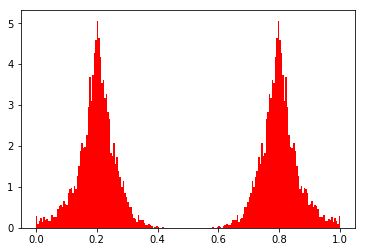

In [15]:
from pymoo.interface import crossover
from pymoo.factory import get_crossover
import numpy as np
import matplotlib.pyplot as plt

def show(eta_cross):
    a,b = np.full((5000, 1), 0.2), np.full((5000, 1), 0.8)
    off = crossover(get_crossover("real_sbx", prob=1.0, eta=eta_cross, prob_per_variable=1.0), a, b)

    plt.hist(off, range=(0,1), bins=200, density=True, color="red")
    plt.show()

show(5)

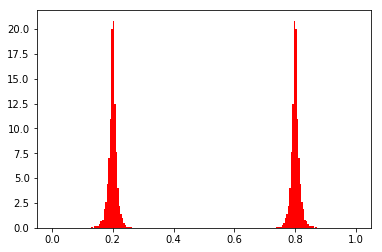

In [16]:
show(30)

### Point Crossover ('real_point', 'bin_point', 'int_point' )


The point crossver is mostly applied to binary optimization problems. But in general in can be used for other variable represenations.

One Point Crossover


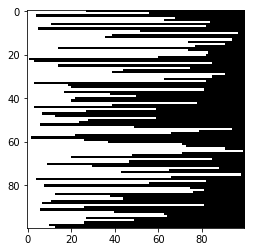

Two Point Crossover


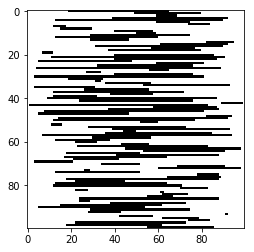

K Point Crossover (k=4)


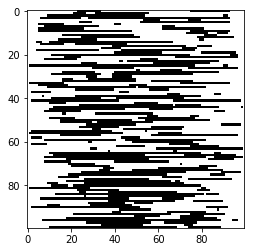

In [3]:
from pymoo.interface import crossover
from pymoo.factory import get_crossover
import numpy as np
import matplotlib.pyplot as plt

def example_parents(n_matings, n_var):
    a = np.arange(n_var)[None, :].repeat(n_matings, axis=0)
    b = a + n_var
    return a, b
    

def show(M):
    plt.figure(figsize=(4,4))
    plt.imshow(M, cmap='Greys',  interpolation='nearest')
    plt.show()

n_matings, n_var = 100, 100
a,b = example_parents(n_matings,n_var)

print("One Point Crossover")
off = crossover(get_crossover("bin_one_point"), a, b)
show((off[:n_matings] != a[0]))

print("Two Point Crossover")
off = crossover(get_crossover("bin_two_point"), a, b)
show((off[:n_matings] != a[0]))

print("K Point Crossover (k=4)")
off = crossover(get_crossover("bin_k_point", n_points=4), a, b)
show((off[:n_matings] != a[0]))

### Uniform Crossover ('real_ux', 'bin_ux', 'int_ux')


Text...

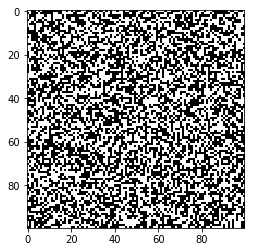

In [6]:
off = crossover(get_crossover("bin_ux"), a, b)
show((off[:n_matings] != a[0]))

### Half Uniform Crossover ('bin_hux', 'int_hux')


Here, a and b are different for indices:  [ 5 15 25 35 45 55 65 75 85 95]


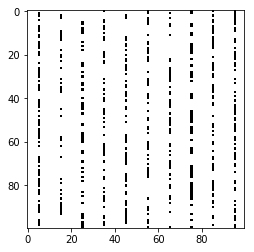

Difference in bits (a to b):  1000
Difference in bits (a to off):  500
Crossover Rate:  0.5


In [5]:
_a = np.full((100,100), False)
_b = np.copy(_a)
_b[:, np.linspace(5, 95, 10).astype(np.int)] = True

print("Here, a and b are different for indices: ", np.where(_a[0] != _b[0])[0])

off = crossover(get_crossover("bin_hux"), _a, _b)
show((off[:100] != _a[0]))

diff_a_to_b = (_a != _b).sum()
diff_a_to_off = (_a != off[:100]).sum()

print("Difference in bits (a to b): ", diff_a_to_b)
print("Difference in bits (a to off): ", diff_a_to_off)

print("Crossover Rate: ", diff_a_to_off / diff_a_to_b)



### Exponential Crossover ('real_exp', 'bin_exp', 'int_exp')


The exponential crossover is mostly a one point crossover, but occasionally it can be a two point crossover. 
First, randomly a starting index is choosen. Then, we add the next variable to be mutated with a specific probility. If we reach the last variable, we continue with the first (wrap around).

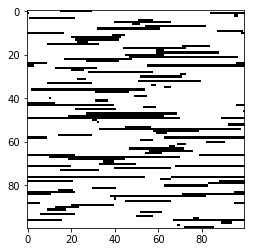

In [6]:
off = crossover(get_crossover("real_exp", prob=0.95), a, b)
show((off[:n_matings] != a[0]))

### Differential Crossover ('real_de')


Text...

### API